# K - En Yakın Komşu (KNN) Sınıflandırma

K En Yakın Komşu (veya kNN), sınıflandırma sorunları için yararlı olan denetimli bir makine öğrenimi algoritmasıdır. Test verileri ile giriş arasındaki mesafeyi hesaplar ve buna göre tahmin verir.

##### Numpy ve Pandas Modülü eklenir

In [1]:
import numpy as np
import pandas as pd

##### İstenilen veri pandas yardımıyla seçilir
##### https://www.kaggle.com/spscientist/students-performance-in-exams#StudentsPerformance.csv adresinden dosyayı indirebilirsiniz

In [2]:
df=pd.read_csv("data/StudentsPerformance.csv") 

##### Verinin ilk 5 satır ekrana gösterilir

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### İstenilen sütunlar ayrılır

In [4]:
df=df[["gender","math score","reading score","writing score"]]

##### Verinin ilk 5 satır ekrana gösterilir

In [5]:
df.head()

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


##### Kategorik değişken sayısal biçime dönüştülür.

In [6]:
df=pd.get_dummies(df,columns=["gender"])

In [7]:
df.head()

,math score,reading score,writing score,gender_female,gender_male
0,72,72,74,1,0
1,69,90,88,1,0
2,90,95,93,1,0
3,47,57,44,0,1
4,76,78,75,0,1


##### Cinsiyet kısmından 1 tanesi seçilir.Böylece gender=1 ise female , eğer gender=0 ise male olacak şekilde tanımlanmış olur.

In [8]:
df=df.rename(columns={"gender_female":"gender"})

In [9]:
df.drop(["gender_male"],axis=1,inplace=True)

##### X ve Y değişkenleri tanılır

In [10]:
X=df[["math score","writing score"]]

In [11]:
Y=df["gender"]

In [12]:
X.head()

,math score,writing score
0,72,74
1,69,88
2,90,93
3,47,44
4,76,75


In [13]:
Y.head()

0    1
1    1
2    1
3    0
4    0
Name: gender, dtype: uint8

##### X ve Y değişkenleri rassal olacak şekilde eğitim ve test  seti olacak olacak şekilde bölünür.(Eğitim  Seti : %75 , Test Seti : %25)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [16]:
print(X_train.shape,Y_train.shape)

(750, 2) (750,)


In [17]:
print(X_test.shape,Y_test.shape)

(250, 2) (250,)


##### X  değişkenine scaler dönüşümü yapılır

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##### KNN Algoritması eklenir ve ardından model oluşturulur

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model=KNeighborsClassifier().fit(X_train,Y_train)

##### Oluşturulan modeldeki test setinin sırasıyla RMSE,r^2 ve Accuracy değerlerine bakılır

In [23]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [24]:
np.sqrt(mean_squared_error(Y_test,knn_model.predict(X_test)))

0.363318042491699

In [25]:
r2_score(Y_test,knn_model.predict(X_test))

0.4716956967213114

In [26]:
accuracy_score(Y_test,knn_model.predict(X_test))

0.868

##### Model görsellenir

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


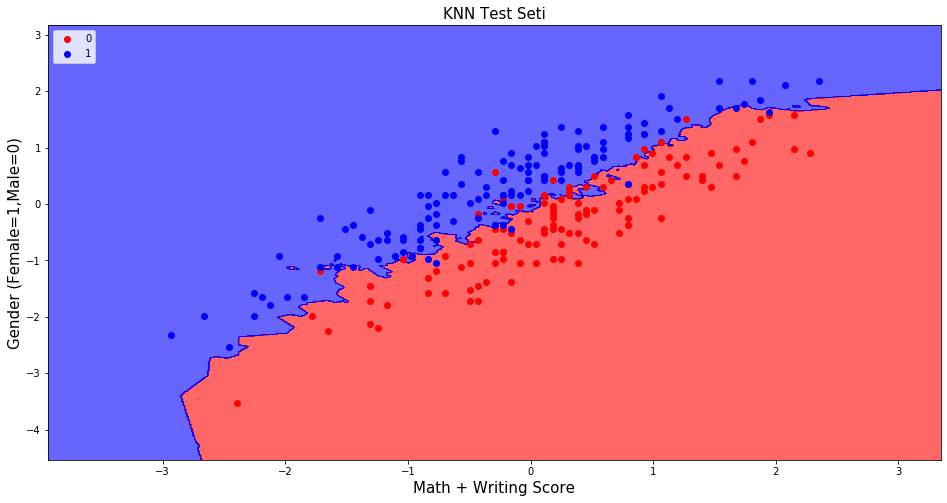

In [28]:
plt.figure(figsize=(16,8))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'blue'))(i), label = j)
font={"fontsize":15}
plt.title('KNN Test Seti',fontdict=font)
plt.xlabel('Math + Writing Score',fontdict=font)
plt.ylabel('Gender (Female=1,Male=0)',fontdict=font)
plt.legend(loc=2)
plt.show();

##### KNN algoritmasında model oluşturulurken daha iyi bir parametre bulmak için GridSearchCV kullanılır

In [29]:
from sklearn.model_selection import GridSearchCV
cv_model=KNeighborsClassifier()
params={"n_neighbors":np.arange(1,50)}

##### En uygun n_neighbors değeri bulunur

In [30]:
cv_model=GridSearchCV(cv_model,params,cv=10,n_jobs=-1)
cv_model=cv_model.fit(X_train,Y_train)
cv_model.best_params_

{'n_neighbors': 24}

##### Model en uygun n_neighbors değeri 24 olacak şekilde yeniden oluşturulur

In [31]:
tuned_model=KNeighborsClassifier(24).fit(X_train,Y_train)

##### Oluşturulan modelin test seti sırasıyla RMSE,r^2 ve Accuracy değerlerine bakılır

In [32]:
np.sqrt(mean_squared_error(Y_test,tuned_model.predict(X_test)))

0.3346640106136302

In [33]:
r2_score(Y_train,tuned_model.predict(X_train))

0.47649572649572647

In [34]:
accuracy_score(Y_train,tuned_model.predict(X_train))

0.8693333333333333

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


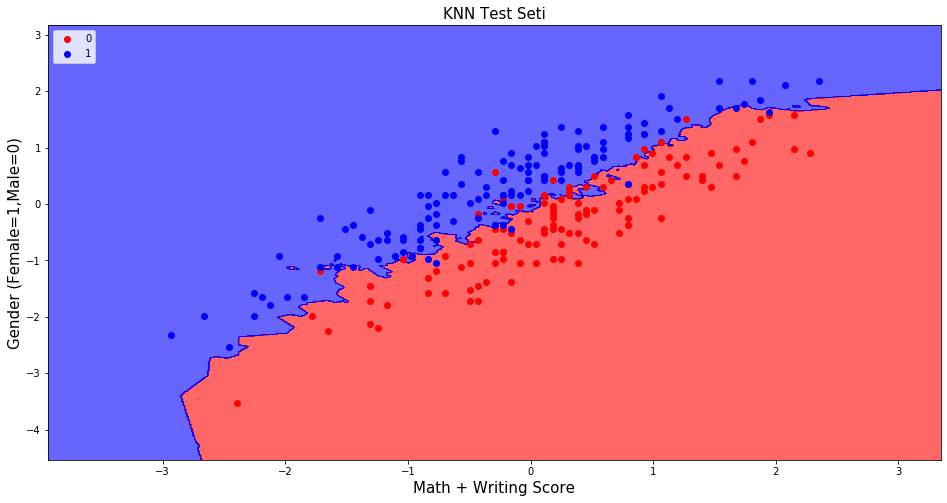

In [35]:
plt.figure(figsize=(16,8))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'blue'))(i), label = j)
font={"fontsize":15}
plt.title('KNN Test Seti',fontdict=font)
plt.xlabel('Math + Writing Score',fontdict=font)
plt.ylabel('Gender (Female=1,Male=0)',fontdict=font)
plt.legend(loc=2)
plt.show();

#### Gercek cinsiyet değeri ile tahmin cinsiyet değeri karşılaştırılır

In [36]:
data=pd.DataFrame({"gercek_y":Y_test,"tahmin_y":tuned_model.predict(X_test)})

In [37]:
data.head()

,gercek_y,tahmin_y
993,1,1
859,0,0
298,0,1
553,0,0
672,1,1
